In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Converting pixel values from integers to Floating Point Values.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
model=models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 122ms/step - accuracy: 0.7911 - loss: 0.6708 - val_accuracy: 0.9780 - val_loss: 0.0686
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 127ms/step - accuracy: 0.9652 - loss: 0.1176 - val_accuracy: 0.9872 - val_loss: 0.0453
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 105ms/step - accuracy: 0.9761 - loss: 0.0831 - val_accuracy: 0.9862 - val_loss: 0.0407
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9840 - loss: 0.0520 - val_accuracy: 0.9907 - val_loss: 0.0309
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9872 - loss: 0.0409 - val_accuracy: 0.9907 - val_loss: 0.0314
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9907 - val_loss: 0.0311
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.9895 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9901 - loss: 0.0286


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



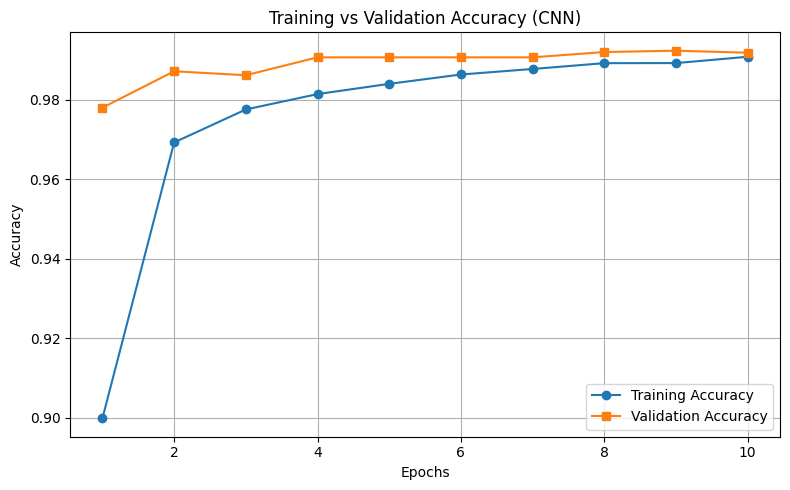

In [ ]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history.history["accuracy"], marker='o', label="Training Accuracy")
plt.plot(epochs, history.history["val_accuracy"], marker='s', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (CNN)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


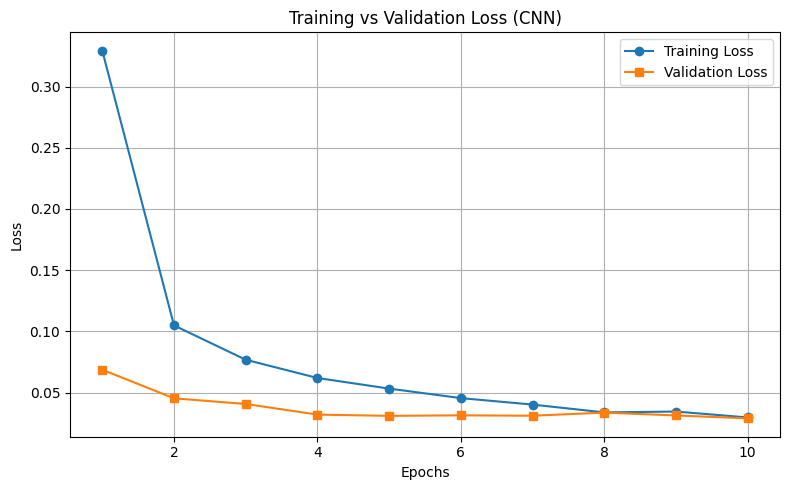

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, history.history["loss"], marker='o', label="Training Loss")
plt.plot(epochs, history.history["val_loss"], marker='s', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (CNN)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
model.save('my_model.keras')


In [ ]:
import requests
import io

image_url = "https://figures.semanticscholar.org/7b14ccbaf08683e3e284d9bfded0712dab8f86ba/3-Figure3-1.png"

# Fetch the image from the URL
response = requests.get(image_url)
image_bytes = io.BytesIO(response.content)
img = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_COLOR)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_url}")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors (MNIST digits are white on black background)
    inverted = cv2.bitwise_not(resized)

    # Normalize pixel values to 0-1 and reshape for the model
    processed_image = inverted.astype("float32") / 255.0
    processed_image = processed_image.reshape(1, 28, 28, 1)

    # Make prediction
    prediction = model.predict(processed_image)
    predicted_digit = np.argmax(prediction)
    print(f"The predicted digit is: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The predicted digit is: 3
